## Emotion Detection with Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [3]:
path_emotion_file = "isear.csv"

# read csv
df_file = pd.read_csv(path_emotion_file, error_bad_lines=False, warn_bad_lines=False, sep='|', encoding='latin1')

df = df_file[['Field1', 'SIT']]  # Field1 target, SIT feature


emotion_groups = df.groupby('Field1').size()

count_vector = TfidfVectorizer()  

In [4]:
accuracy_nb = list()
accuracy_lr = list()

#### Emotion Detection with Naive Bayes

In [21]:
for i in range(20):
    train, test = train_test_split(df, test_size=0.3, shuffle=True)



    vectors = count_vector.fit_transform(train.SIT)


    vectors_test = count_vector.transform(test.SIT)
    clf = MultinomialNB()
    clf.fit(vectors, train.Field1)

    predict = clf.predict(vectors_test)

    accuracy_nb.append(np.mean(predict == test.Field1))

np.mean(accuracy_nb)

0.5481563749444691

#### Emotion Detection with Logistic Regression

In [22]:
for i in range(20):
    train, test = train_test_split(df, test_size=0.3, shuffle=True)



    vectors = count_vector.fit_transform(train.SIT)


    vectors_test = count_vector.transform(test.SIT)
    clf = LogisticRegression()
    clf.fit(vectors, train.Field1)

    predict = clf.predict(vectors_test)

    accuracy_lr.append(np.mean(predict == test.Field1))

np.mean(accuracy_lr)

0.5731674811195024

### Logistic Regression vs Naive Bayes

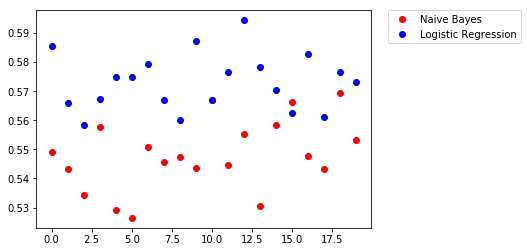

In [30]:
%matplotlib inline
plt.subplot()
plt.plot(accuracy_nb, 'o',color='red', label='Naive Bayes') # naive bayes

plt.subplot()
plt.plot(accuracy_lr, 'o',color='blue', label='Logistic Regression') # logistic regression
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Model Selection for Logistic Regression

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [7]:
# ref: https://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [7]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

algorithms_estimator = Pipeline([
    ('vect', TfidfVectorizer()),
    ('lr', LogisticRegression()),
])

parameters = {
    'lr__penalty': ['l1', 'l2'],
    'vect__stop_words': [None, 'english'],
    'vect__smooth_idf': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'vect__tokenizer': [None, LemmaTokenizer()],

}

clf = GridSearchCV(algorithms_estimator, parameters, cv=10, n_jobs=8)
clf.fit(train.SIT, train.Field1)
result=clf.cv_results_

In [29]:
import warnings
warnings.filterwarnings('ignore')

result_df = pd.DataFrame(result)
result_df = result_df[['rank_test_score','param_lr__penalty', 'param_vect__stop_words', 'param_vect__smooth_idf', 'param_vect__ngram_range', 'param_vect__tokenizer', 'mean_test_score']]
result_df = result_df.sort_values(by="rank_test_score")
result_df.head()

,rank_test_score,param_lr__penalty,param_vect__stop_words,param_vect__smooth_idf,param_vect__ngram_range,param_vect__tokenizer,mean_test_score
21,1,l2,None,False,"(1, 1)",<__main__.LemmaTokenizer object at 0x7f764fdd9...,0.567784
17,2,l2,None,True,"(1, 1)",<__main__.LemmaTokenizer object at 0x7f764fdd9...,0.567593
20,3,l2,None,False,"(1, 1)",None,0.566832
16,4,l2,None,True,"(1, 1)",None,0.565689
19,5,l2,english,True,"(1, 1)",<__main__.LemmaTokenizer object at 0x7f764fdd9...,0.562452


In [5]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    """
    if normalize:
    	plt.savefig("normalized_confusionwl.png")
    else:
    	plt.savefig("confusionwl.png")
    """

In [10]:
train, test = train_test_split(df, test_size=0.2, shuffle=True)

count_vector = TfidfVectorizer(smooth_idf=False, ngram_range=(1,1), tokenizer=LemmaTokenizer())

vectors = count_vector.fit_transform(train.SIT)

vectors_test = count_vector.transform(test.SIT)
clf = LogisticRegression(penalty='l2', )
clf.fit(vectors, train.Field1)

predict = clf.predict(vectors_test)

D:\Anaconda3\envs\workplace\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\workplace\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion matrix, without normalization
[[102  27  12  27  15   8  16]
 [ 22 138   8   7   5   8  23]
 [  9  11 151   7  12   8   9]
 [ 34  19  13  84   8  12  25]
 [ 12  14   5  15 163  10   8]
 [ 15   8  10  18  17 134  13]
 [ 17  27  18  39  22  11 105]]
Normalized confusion matrix
[[0.49 0.13 0.06 0.13 0.07 0.04 0.08]
 [0.1  0.65 0.04 0.03 0.02 0.04 0.11]
 [0.04 0.05 0.73 0.03 0.06 0.04 0.04]
 [0.17 0.1  0.07 0.43 0.04 0.06 0.13]
 [0.05 0.06 0.02 0.07 0.72 0.04 0.04]
 [0.07 0.04 0.05 0.08 0.08 0.62 0.06]
 [0.07 0.11 0.08 0.16 0.09 0.05 0.44]]


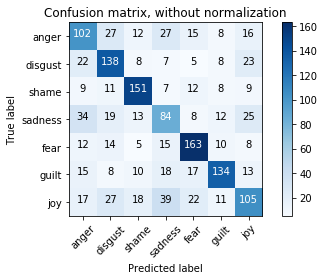

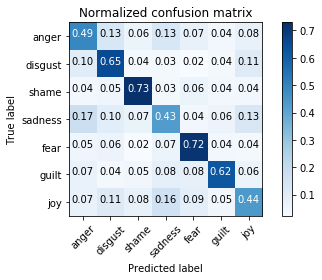

In [11]:
import numpy as np

cnf_matrix = confusion_matrix(test.Field1, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(),
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(), normalize=True,
                      title='Normalized confusion matrix')